In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import keras
import tensorflow

In [ ]:
from tensorflow.keras.datasets import cifar100

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

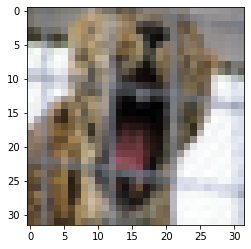

In [ ]:
plt.imshow(x_train[250])

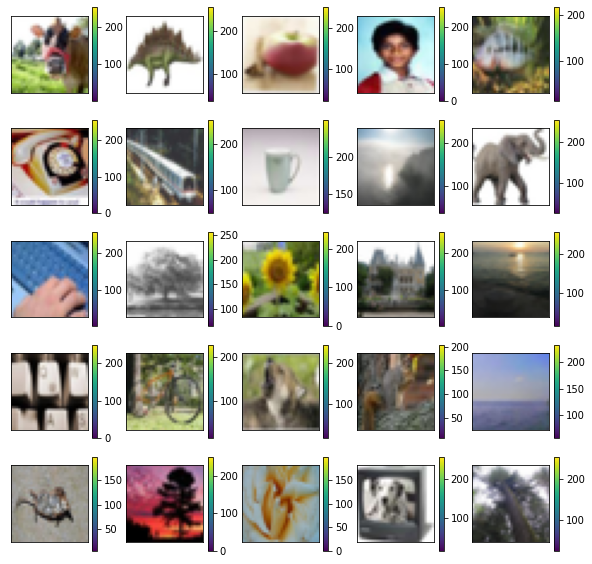

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.colorbar()
plt.show()

In [ ]:
#identify number of labels
pd.DataFrame(y_train).value_counts()

99    500
36    500
26    500
27    500
28    500
     ... 
69    500
70    500
71    500
72    500
0     500
Length: 100, dtype: int64

In [ ]:
#Reshape data into 32bit 
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
#normalize
x_train/=255
x_test/=255


In [ ]:
from tensorflow.keras.utils import to_categorical



In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
x_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7647059 , 0.8039216 , 0.75686276],
         [0.83137256, 0.8784314 , 0.8       ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.6666667 , 0.6901961 , 0.5882353 ],
         [0.6313726 , 0.65882355, 0.50980395],
         [0.57254905, 0.6039216 , 0.44313726]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7411765 , 0.78039217, 0.6627451 ],
         [0.6509804 , 0.69803923, 0.50980395],
         [0.4745098 , 0.52156866, 0.34117648]],

        ...,

        [[0.5803922 , 0.7254902 , 0.30980393],
         [0.5568628 , 0.7137255 , 0.22352941]

In [ ]:
pd.DataFrame(y_train).value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99 
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation

In [60]:
cnn=Sequential()
cnn.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(32,32,3),padding='same'))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(256,activation='relu'))
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(100,activation='softmax'))


In [61]:
from tensorflow.keras.optimizers import SGD

In [62]:
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
cnn.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)            

In [63]:
cnn.fit(x_train,y_train,batch_size=128,epochs=40,validation_data = (x_test,y_test))

Epoch 1/40
391/391 [==============================] - 4s 10ms/step - loss: 4.0329 - accuracy: 0.0824 - val_loss: 3.5862 - val_accuracy: 0.1496
Epoch 2/40
391/391 [==============================] - 4s 9ms/step - loss: 3.2678 - accuracy: 0.2064 - val_loss: 3.0754 - val_accuracy: 0.2484
Epoch 3/40
391/391 [==============================] - 4s 9ms/step - loss: 2.8879 - accuracy: 0.2779 - val_loss: 2.7845 - val_accuracy: 0.3017
Epoch 4/40
391/391 [==============================] - 4s 9ms/step - loss: 2.6183 - accuracy: 0.3329 - val_loss: 2.6352 - val_accuracy: 0.3366
Epoch 5/40
391/391 [==============================] - 4s 9ms/step - loss: 2.4142 - accuracy: 0.3764 - val_loss: 2.5220 - val_accuracy: 0.3579
Epoch 6/40
391/391 [==============================] - 4s 9ms/step - loss: 2.2554 - accuracy: 0.4088 - val_loss: 2.4541 - val_accuracy: 0.3790
Epoch 7/40
391/391 [==============================] - 4s 9ms/step - loss: 2.1065 - accuracy: 0.4410 - val_loss: 2.4200 - val_accuracy: 0.3875
Epoch